<a href="https://colab.research.google.com/github/Miguellopescruzrodrigues/web-project/blob/master/Exercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://colab.research.google.com/drive/1XlUrz2_dcKnsbHfTUvY8a8RATATr9XBX#scrollTo=0sRCsFc7JClS
!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
!apt-get inatall libpython3.6-dev
!rm -f root_v6.28.04_Ubuntu_20.04.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: root_build/tutorials/gui/calendar.C  
  inflating: root_build/tutorials/gui/mditest.C  
  inflating: root_build/tutorials/gui/Slider3Demo.C  
  inflating: root_build/tutorials/gui/mditestbg.xpm  
  inflating: root_build/tutorials/gui/textEntries.C  
  inflating: root_build/tutorials/gui/ntupleTableTest.C  
  inflating: root_build/tutorials/gui/customContextMenu.C  
  inflating: root_build/tutorials/gui/splitterHorizontal.C  
  inflating: root_build/tutorials/gui/guiWithCINT.C  
  inflating: root_build/tutorials/gui/CPUMeter.C  
  inflating: root_build/tutorials/gui/numberEntry.C  
  inflating: root_build/tutorials/gui/splitbuttonTest.C  
  inflating: root_build/tutorials/gui/buttonTest.C  
  inflating: root_build/tutorials/gui/simpleTableTest.C  
  inflating: root_build/tutorials/gui/drag_and_drop.C  
  inflating: root_build/tutorials/gui/textviewostream.C  
  inflating: root_build/tutorials/gui/listBox.C  
  infla

In [2]:
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!rm -f libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-04-29 16:52:05--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.91.81, 91.189.91.82, 91.189.91.83, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.91.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  2.22MB/s    in 0.6s    

2024-04-29 16:52:06 (2.22 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’ saved [1318204/1318204]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 121902 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-lik

In [3]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')

<CDLL '/content/root_build/lib//libTreePlayer.so', handle 5bd8d78877e0 at 0x7d1189086ec0>

In [4]:
#import ROOT
#h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#h.FillRandom("gaus")
#c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#h.Draw()
#c.Draw()


In [7]:
#Block to import all the ROOT functions that we will be using throughout this template
from ROOT import TFile
from ROOT import TLorentzVector
from ROOT import TH1F
from ROOT import TF1
import numpy as np
from ROOT import RooRealVar
from ROOT import RooDataHist
from ROOT import RooDataSet
from ROOT import RooExponential
from ROOT import RooGaussian
from ROOT import RooVoigtian
from ROOT import RooPolynomial
from ROOT import RooArgList
from ROOT import RooArgSet
from ROOT import RooAddPdf
from ROOT import RooPlot
from ROOT import TLegend
from ROOT import RooFit
from ROOT import TLatex
from ROOT import RooChi2Var
from ROOT import TStyle
from ROOT import TCanvas, TFile, TPaveText, TH1F, TLegend, TTree
from ROOT import gStyle, TGraphErrors, TF1, TGraph, gPad, gRandom
from ROOT import kRed, kBlue
from ROOT import TFitResultPtr, TMatrixD



Welcome to JupyROOT 6.28/04


**Exemplo 03:** Importando dados I

Ref.: https://github.com/clelange/roofit/blob/master/rf102_dataimport.py

In [8]:
# Criando uma TTree chamada "tree" e adicionando dois ramos (branches) a ela: "x" e "y".
# Em seguida, preenchemos a TTree com dados aleatórios usando gRandom.Gaus e gRandom.Uniform.
from array import array

tree = TTree("tree", "tree")
px = array('d', [0])
py = array('d', [0])
tree.Branch("x", px, "x/D")
tree.Branch("y", py, "y/D")
#
for i in range(100):
    px[0] = gRandom.Gaus(0, 3)
    py[0] = gRandom.Uniform() * 30 - 15
    tree.Fill()
#Depois disso, estamos utilizando o RooFit para importar os dados do TTree para um RooDataSet chamado "ds".
# Define 2nd observable y
x = RooRealVar("x", "x", -3, 3)
y = RooRealVar("y", "y", -10, 10)
ds = RooDataSet("ds", "ds", RooArgSet(x, y),RooFit.Import(tree))
ds.Print()

[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(ds) Skipping event #0 because y cannot accommodate the value -10.1127
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(ds) Skipping event #1 because x cannot accommodate the value 3.31679
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(ds) Skipping event #2 because x cannot accommodate the value -9.37891
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(ds) Skipping event #7 because y cannot accommodate the value -14.0899
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(ds) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(ds) Ignored 58 out-of-range events
RooDataSet::ds[x,y] = 42 entries


Info in <TCanvas::Print>: png file dataimport.png has been created


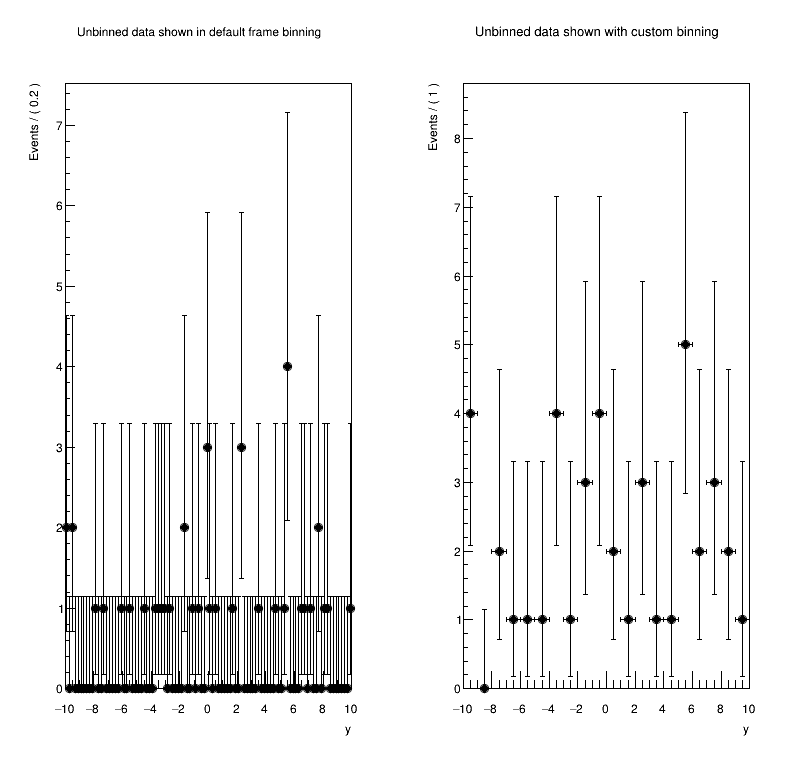

In [9]:
# P l o t   d a t a s e t   w i t h   m u l t i p l e   b i n n i n g   c h o i c e s
# ------------------------------------------------------------------------------------
# Print unbinned dataset with default frame binning (100 bins)
frame = y.frame(RooFit.Title("Unbinned data shown in default frame binning"))
ds.plotOn(frame)

# Print unbinned dataset with custom binning choice (20 bins)
frame2 = y.frame(RooFit.Title("Unbinned data shown with custom binning"))
ds.plotOn(frame2, RooFit.Binning(20))

# Draw all frames on a canvas
c = TCanvas("dataimport", "dataimport", 800, 800)
c.Divide(2)
c.cd(1)
gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()
c.cd(2)
gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.4)
frame2.Draw()
c.Draw()
c.SaveAs("dataimport.png")




**Exemplo 03:** Importando dados II

In [10]:
# Abrir o arquivo ROOT e obter o TNtuple
!wget https://github.com/elizamelo/Analise-Dados-FAE/raw/main/2024_01/RooFit/example_data.root

fin = TFile("example_data.root")
nt = fin.Get("nt")

# Definir a variável RooRealVar
mass = RooRealVar("mass", "mass [GeV]", 0.0, 2.0)

# Criar o RooDataSet com a variável definida e o TNtuple
# I m p o r t a r   o   d a d o   u n b i n n e d
# --------------------------------------------------------------
# construtor do RooDataSet
data = RooDataSet("data", "data", RooArgSet(mass), RooFit.Import(nt))

#O método data.Print("v") imprime informações sobre o RooDataSet,
#incluindo os nomes das variáveis e os valores dos eventos,
#para que você possa verificar se os dados foram importados corretamente.
data.Print("v")


--2024-04-29 16:53:12--  https://github.com/elizamelo/Analise-Dados-FAE/raw/main/2024_01/RooFit/example_data.root
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/elizamelo/Analise-Dados-FAE/main/2024_01/RooFit/example_data.root [following]
--2024-04-29 16:53:12--  https://raw.githubusercontent.com/elizamelo/Analise-Dados-FAE/main/2024_01/RooFit/example_data.root
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83215 (81K) [application/octet-stream]
Saving to: ‘example_data.root’

example_data.root   100%[===================>]  81.26K  --.-KB/s    in 0.004s  

2024-04-29 16:53:13 (19.2 MB/s) - ‘ex

[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 0.05] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **   19 **SET PRINT           1
 **********
 **********
 **   20 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         1.00000e+00  2.00000e-02    1.00000e+00  1.20000e+00
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 BROUGHT BACK INSIDE LIMITS.
     2 sigma        5.00000e-02  5.00000e-03    0.00000e+00  5.00000e-02
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 IS AT ITS UPPER ALLOWED LIMIT.
 MINUIT WARNING

Warning in <TCanvas::Constructor>: Deleting canvas with same name: exemplo03


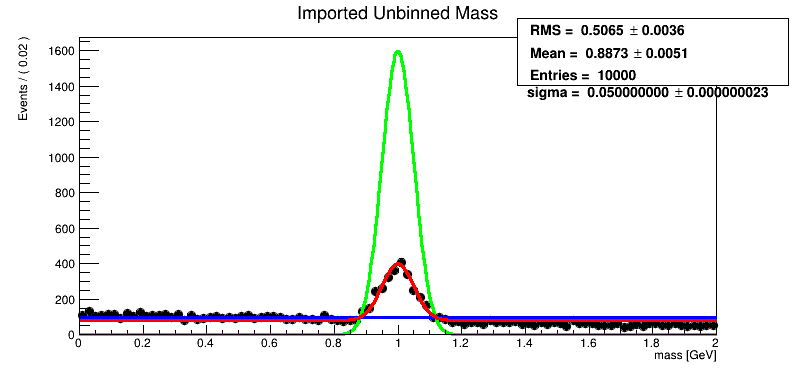

In [13]:
# Make a plot of unbinned dataset (ROOT.RooFit # default)
frame3 = mass.frame(RooFit.Title("Imported Unbinned Mass"))
data.plotOn(frame3)

# Fit a Gaussian p.d.f to the data
mean = RooRealVar("mean", "mean", 1.0, 1., 1.2)

sigma = RooRealVar("sigma", "sigma",0.05, 0., 0.05)

pol1 = RooRealVar("pol1", "Constant of the polynomial", 0, -10.0, 10.0)

gauss = RooGaussian("gauss", "gauss", mass, mean, sigma)
Linear = RooPolynomial("Linear", "Linear", mass, pol1)

sinal = RooRealVar("sinal", "sinal", 0.2)
sum_pdf = RooAddPdf("sum_pdf", "Sum of Gaussian and Linear", RooArgList(gauss, Linear), RooArgList(sinal))


gauss.fitTo(data)
#gauss.fitTo(data,RooFit.PrintLevel(-1))
#gauss.fitTo(data, RooFit.PrintLevel(-1), RooFit.Minimizer("Minuit2", "Migrad"))
gauss.plotOn(frame3, LineColor="g")
Linear.plotOn(frame3, LineColor="b")
sum_pdf.plotOn(frame3, LineColor="r");

sum_pdf.paramOn(frame3,data);
gauss.paramOn(frame3,data)
Linear.paramOn(frame3,data)

data.statOn(frame3)
c3 = TCanvas("exemplo03","exemplo03",800,400)
frame3.Draw()
c3.Draw()

gauss.Print("t")


LineColor="r"


Exercício 01:
**O que precisamos fazer para melhorar esse fit?**


[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 5] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         1.00000e+00  2.00000e-01    0.00000e+00  2.00000e+00
     2 sigma        1.80000e-01  9.00000e-02    0.00000e+00  5.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE 